In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv('boston.csv')

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [11]:
missing_values = data.isnull().sum()


# Report the missing values
print("Missing values in each column:")
for column, count in zip(data.columns, missing_values):
    print(f"{column}: {count} missing values")

Missing values in each column:
CRIM: 0 missing values
ZN: 0 missing values
INDUS: 0 missing values
CHAS: 0 missing values
NOX: 0 missing values
RM: 0 missing values
AGE: 0 missing values
DIS: 0 missing values
RAD: 0 missing values
TAX: 0 missing values
PTRATIO: 0 missing values
B: 0 missing values
LSTAT: 0 missing values
MEDV: 0 missing values


In [13]:


# Extract the TAX column
tax_data = data['TAX']

# (1) Minimum, Maximum, and Range
tax_min = tax_data.min()
tax_max = tax_data.max()
tax_range = tax_max - tax_min

# (2) Mean and Median
tax_mean = tax_data.mean()
tax_median = tax_data.median()

# (3) Variance and Standard Deviation
tax_variance = tax_data.var()
tax_std_dev = tax_data.std()

# (4) 1st Quartile and 3rd Quartile
tax_q1 = tax_data.quantile(0.25)
tax_q3 = tax_data.quantile(0.75)

# (5) Inter-quartile Range
tax_iqr = tax_q3 - tax_q1

# (6) 12th Percentile
tax_12th_percentile = tax_data.quantile(0.12)

# Report the summary statistics
print("Summary Statistics for TAX feature:")
print(f"Minimum: {tax_min}")
print(f"Maximum: {tax_max}")
print(f"Range: {tax_range}")
print(f"Mean: {tax_mean}")
print(f"Median: {tax_median}")
print(f"Variance: {tax_variance}")
print(f"Standard Deviation: {tax_std_dev}")
print(f"1st Quartile: {tax_q1}")
print(f"3rd Quartile: {tax_q3}")
print(f"Inter-quartile Range: {tax_iqr}")
print(f"12th Percentile: {tax_12th_percentile}")


Summary Statistics for TAX feature:
Minimum: 187.0
Maximum: 711.0
Range: 524.0
Mean: 408.2371541501976
Median: 330.0
Variance: 28404.75948812273
Standard Deviation: 168.53711605495903
1st Quartile: 279.0
3rd Quartile: 666.0
Inter-quartile Range: 387.0
12th Percentile: 243.6


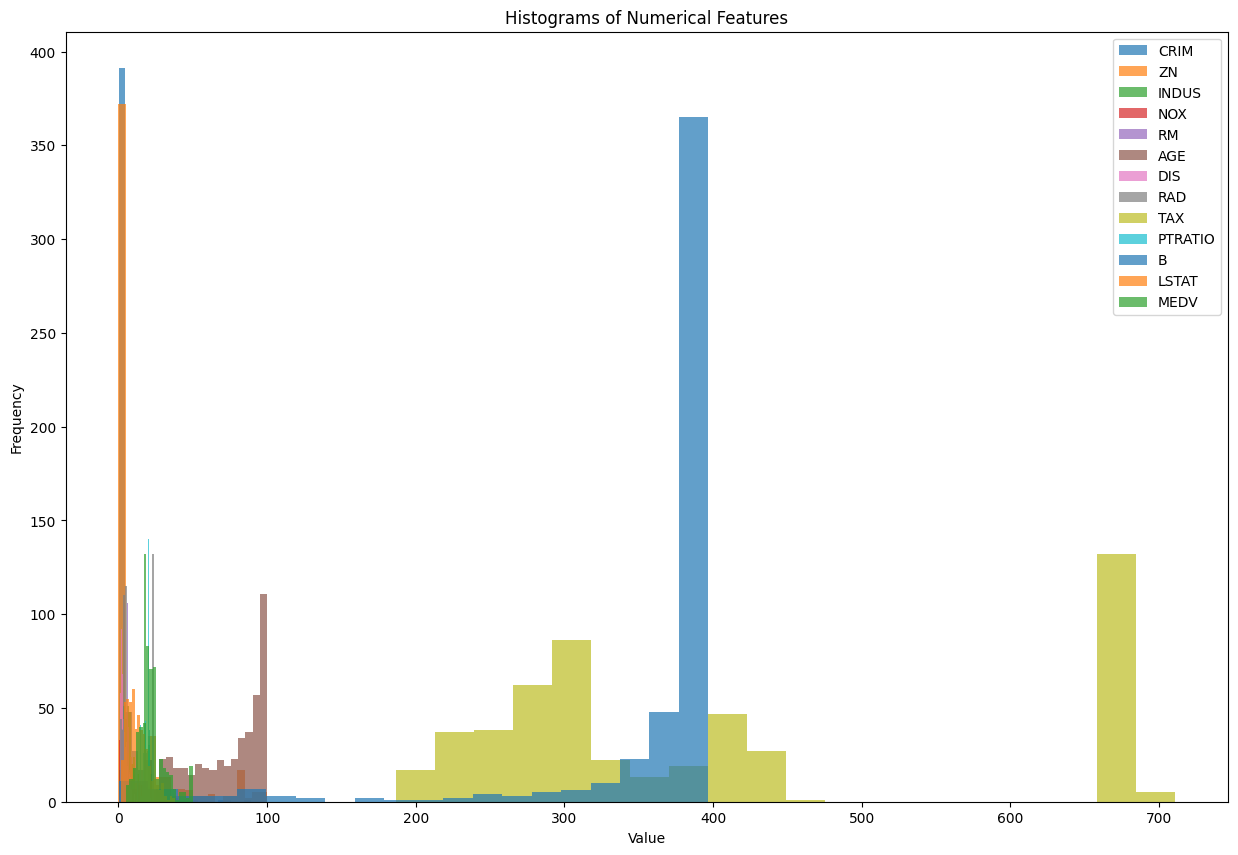

Features with bimodal distributions:
['AGE', 'B']


In [20]:
# Get numerical features (excluding CHAS which is binary)
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 10))
for feature in numerical_features:
    plt.hist(data[feature], bins=20, alpha=0.7, label=feature)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histograms of Numerical Features')
plt.show()

# Features that appear to have bimodal distributions
bimodal_features = ['AGE', 'B']

print("Features with bimodal distributions:")
print(bimodal_features)


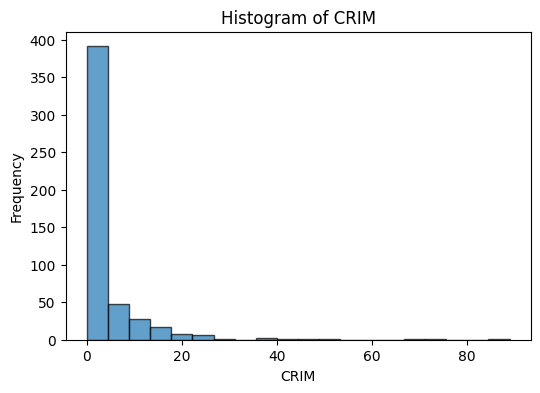

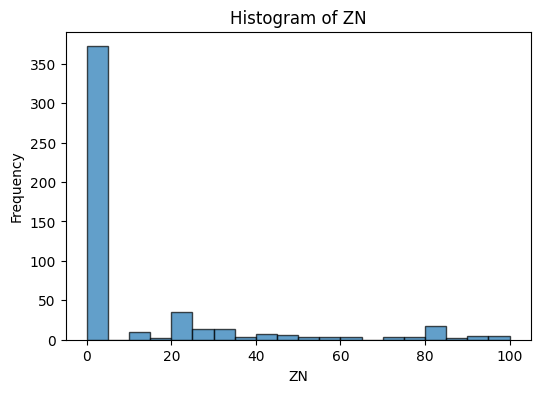

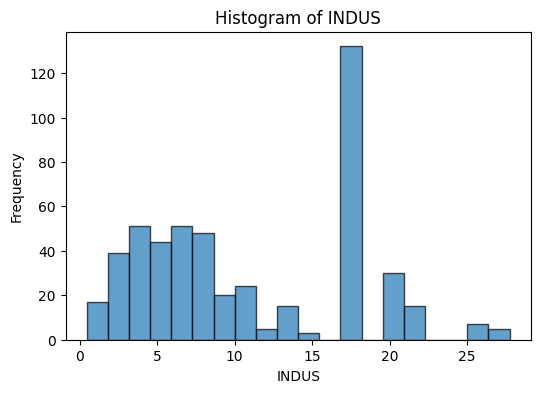

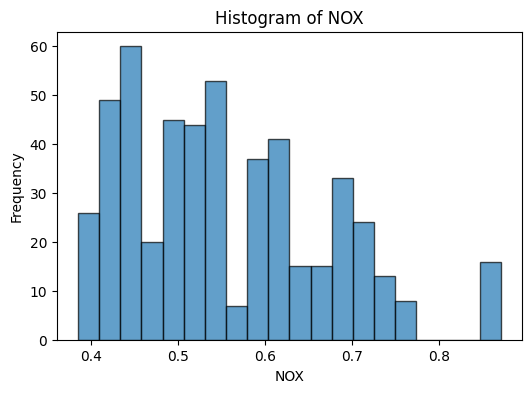

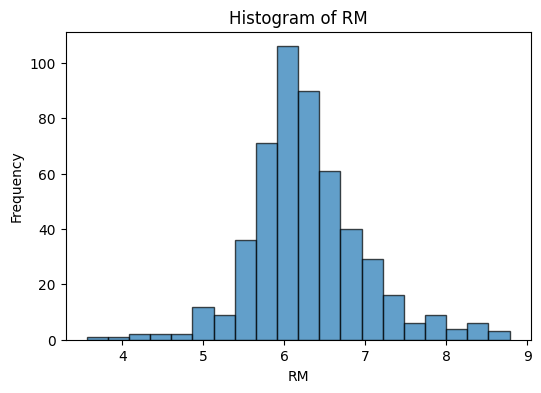

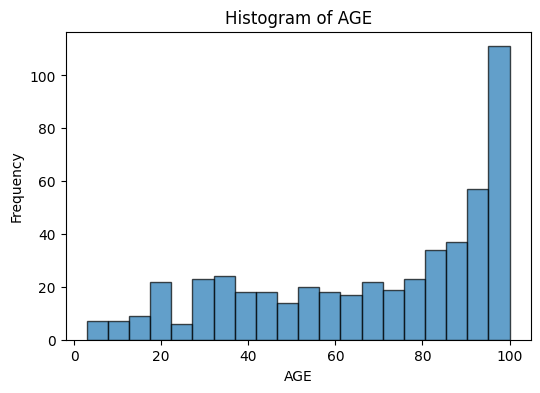

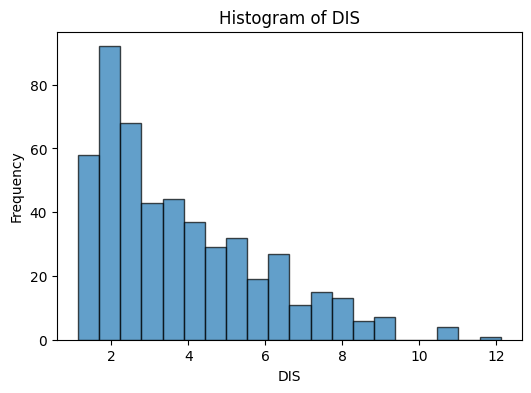

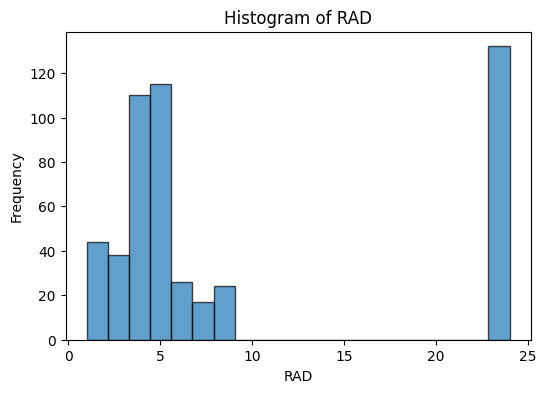

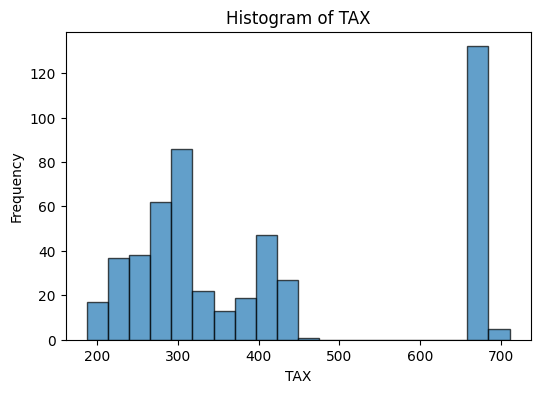

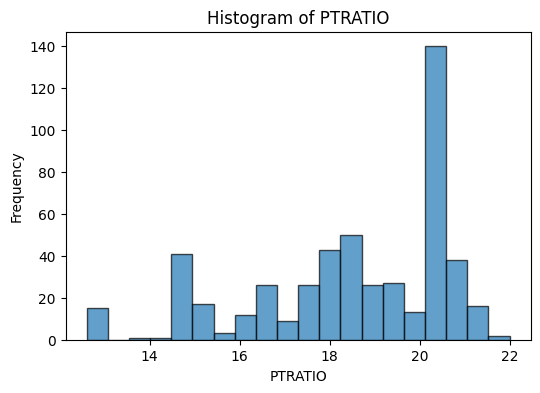

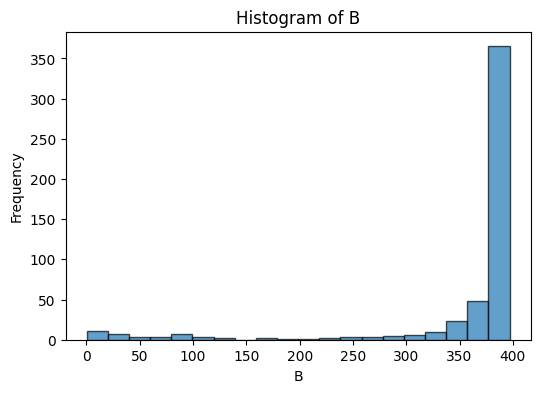

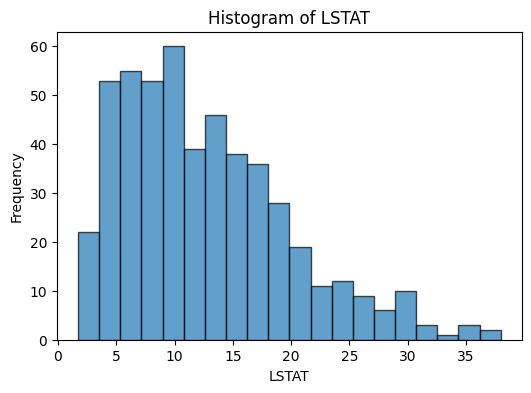

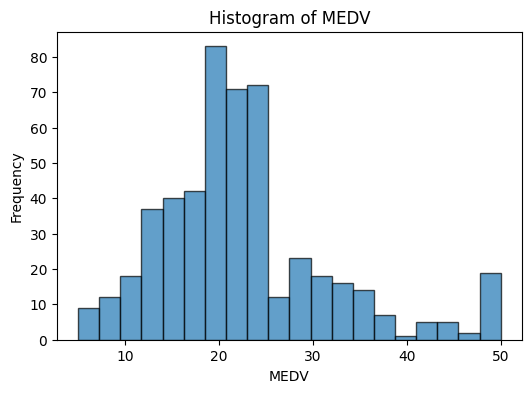

In [23]:
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Plot histograms for each numerical feature separately
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()


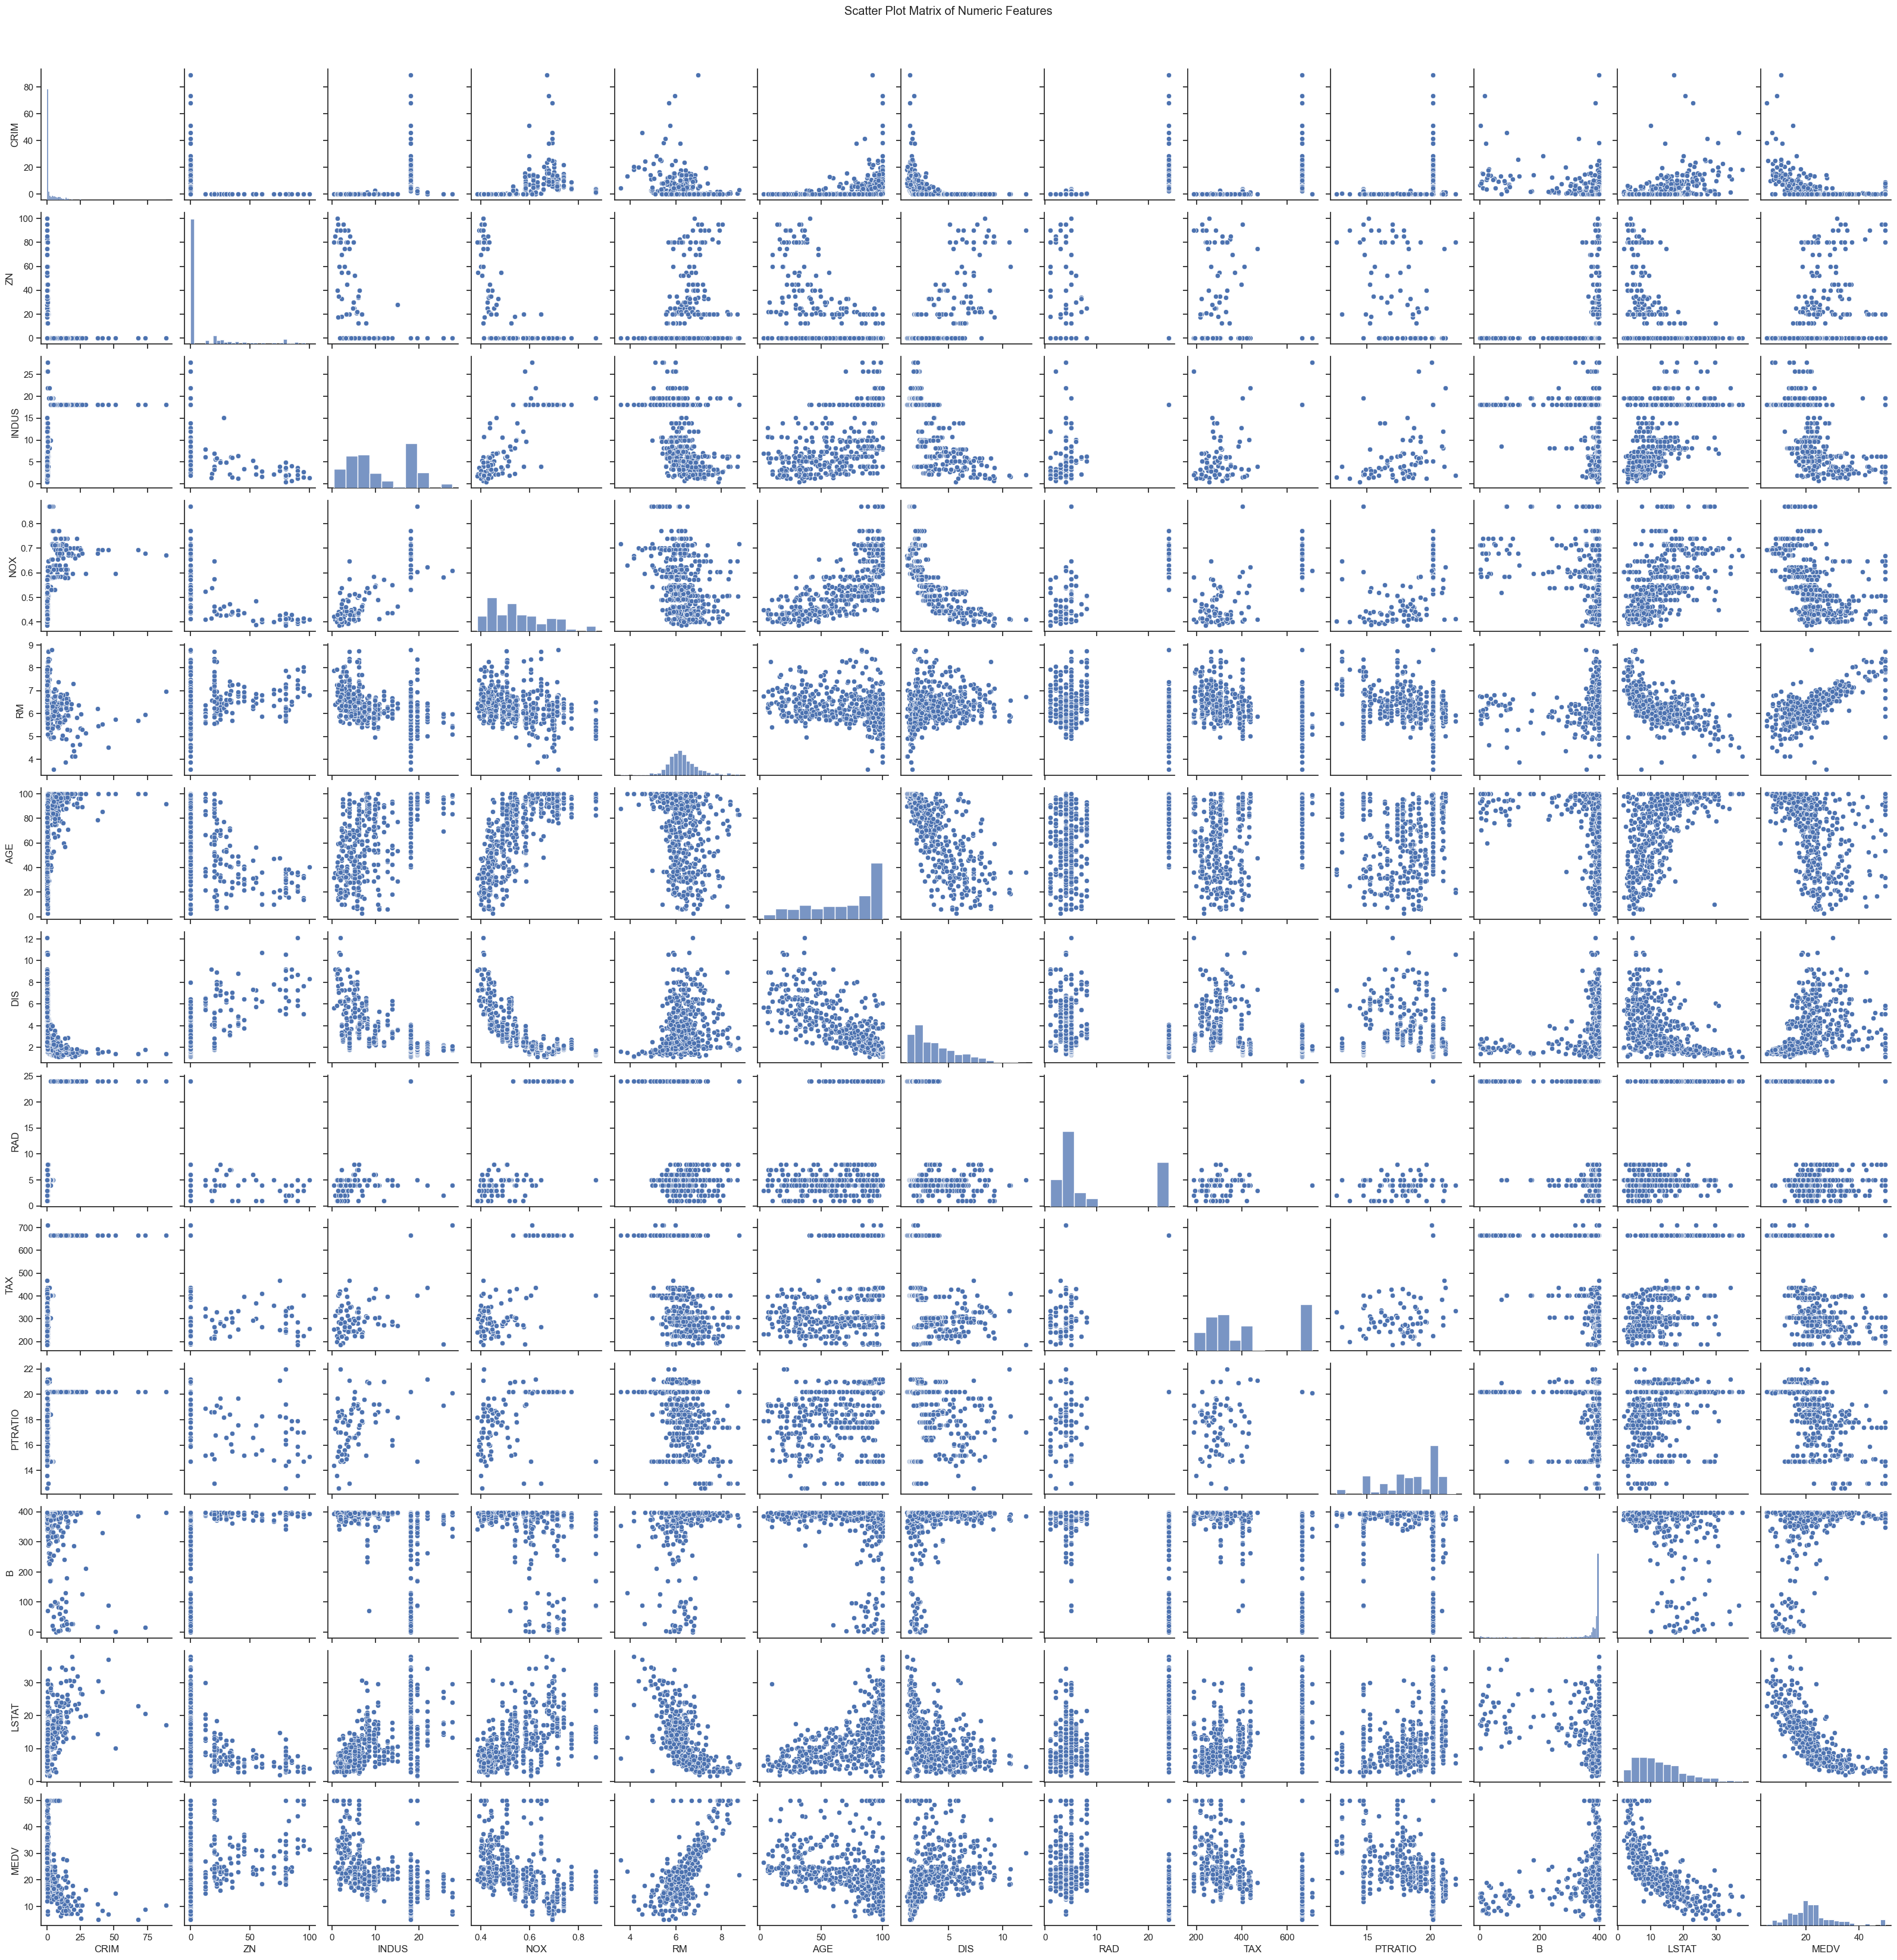

In [27]:
numerical_data = data[numerical_features]

# Create a scatter plot matrix
sns.set(style="ticks")
scatter_matrix = sns.pairplot(numerical_data)
plt.suptitle('Scatter Plot Matrix of Numeric Features', y=1.02)
plt.show()

In [28]:
# Calculate correlations between features
correlations = numerical_data.corr()

# Identify feature pairs with positive correlation
positive_corr_pairs = [(feature1, feature2) for feature1 in numerical_features
                       for feature2 in numerical_features if feature1 != feature2 and correlations.loc[feature1, feature2] > 0.5]

# Identify feature pairs with negative correlation
negative_corr_pairs = [(feature1, feature2) for feature1 in numerical_features
                       for feature2 in numerical_features if feature1 != feature2 and correlations.loc[feature1, feature2] < -0.5]

print("Feature pairs with positive correlation:")
print(positive_corr_pairs)

print("\nFeature pairs with negative correlation:")
print(negative_corr_pairs)

Feature pairs with positive correlation:
[('CRIM', 'RAD'), ('CRIM', 'TAX'), ('ZN', 'DIS'), ('INDUS', 'NOX'), ('INDUS', 'AGE'), ('INDUS', 'RAD'), ('INDUS', 'TAX'), ('INDUS', 'LSTAT'), ('NOX', 'INDUS'), ('NOX', 'AGE'), ('NOX', 'RAD'), ('NOX', 'TAX'), ('NOX', 'LSTAT'), ('RM', 'MEDV'), ('AGE', 'INDUS'), ('AGE', 'NOX'), ('AGE', 'TAX'), ('AGE', 'LSTAT'), ('DIS', 'ZN'), ('RAD', 'CRIM'), ('RAD', 'INDUS'), ('RAD', 'NOX'), ('RAD', 'TAX'), ('TAX', 'CRIM'), ('TAX', 'INDUS'), ('TAX', 'NOX'), ('TAX', 'AGE'), ('TAX', 'RAD'), ('TAX', 'LSTAT'), ('LSTAT', 'INDUS'), ('LSTAT', 'NOX'), ('LSTAT', 'AGE'), ('LSTAT', 'TAX'), ('MEDV', 'RM')]

Feature pairs with negative correlation:
[('ZN', 'INDUS'), ('ZN', 'NOX'), ('ZN', 'AGE'), ('INDUS', 'ZN'), ('INDUS', 'DIS'), ('NOX', 'ZN'), ('NOX', 'DIS'), ('RM', 'LSTAT'), ('AGE', 'ZN'), ('AGE', 'DIS'), ('DIS', 'INDUS'), ('DIS', 'NOX'), ('DIS', 'AGE'), ('DIS', 'TAX'), ('TAX', 'DIS'), ('PTRATIO', 'MEDV'), ('LSTAT', 'RM'), ('LSTAT', 'MEDV'), ('MEDV', 'PTRATIO'), ('MEDV', 'LS

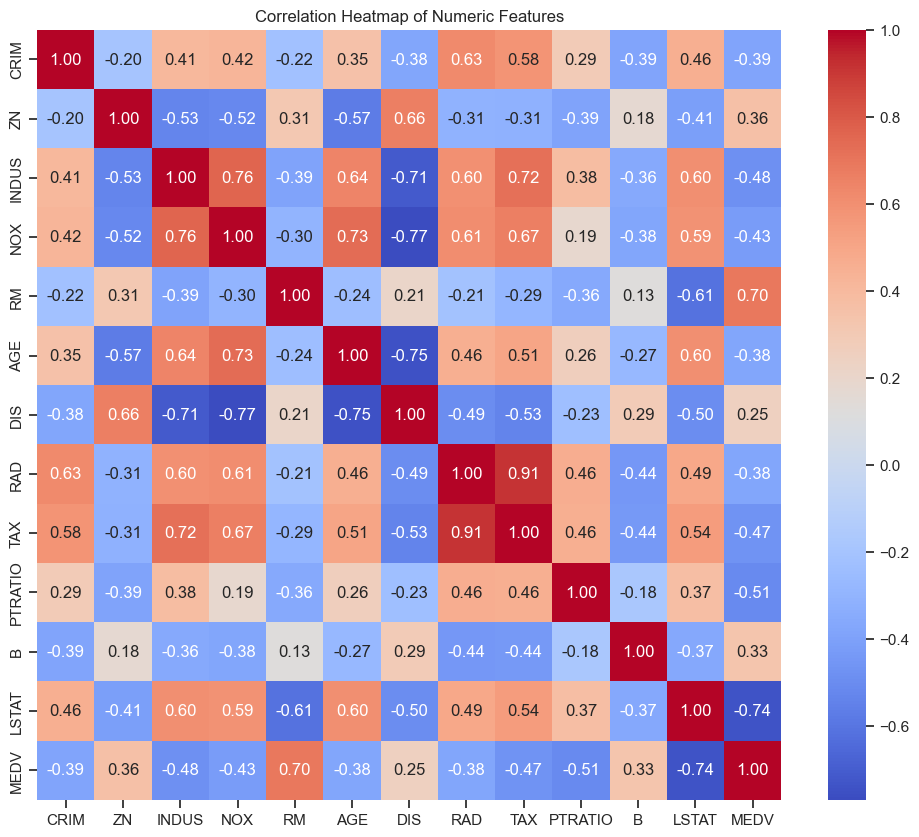

In [29]:
#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', 
            xticklabels=numerical_features, yticklabels=numerical_features)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [33]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Create a DataFrame with standardized features
standardized_df = pd.DataFrame(standardized_data, columns=numerical_features)

# Combine the standardized features with MEDV and CHAS
final_data = pd.concat([standardized_df, data[['MEDV', 'CHAS']]], axis=1)

# Display the first few rows of the standardized dataset
print("Standardized Dataset:")
print(final_data.head(10))

Standardized Dataset:
       CRIM        ZN     INDUS       NOX        RM       AGE       DIS   
0 -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214  \
1 -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   
5 -0.417044 -0.487722 -1.306878 -0.835284  0.207096 -0.351157  1.077737   
6 -0.410243  0.048772 -0.476654 -0.265154 -0.388411 -0.070229  0.839244   
7 -0.403696  0.048772 -0.476654 -0.265154 -0.160466  0.978808  1.024638   
8 -0.395935  0.048772 -0.476654 -0.265154 -0.931206  1.117494  1.087196   
9 -0.400729  0.048772 -0.476654 -0.265154 -0.399808  0.616090  1.329635   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  MEDV  CHAS  
0 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  24.0     0  
